In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


In [2]:
df = pd.read_csv('house_price_cleaned.csv')
df.head()


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,zipcode
0,1,126958.0,2.0,3.000000,4933,6222,2,0,3,Fair,98103
1,2,676155.0,2.0,3.000000,4277,6315,1,0,1,Poor,98103
2,3,136932.0,4.0,2.021053,3369,5869,1,0,3,Good,98102
3,4,370838.0,4.0,1.000000,3734,1876,1,1,3,Poor,98104
4,5,264178.0,1.0,1.000000,4291,8027,2,0,3,Poor,98104


In [4]:
features = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors']
data = df[features]

# Handle missing values (if any)
data = data.dropna()


In [5]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)


In [6]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_data)
df['Cluster'] = clusters


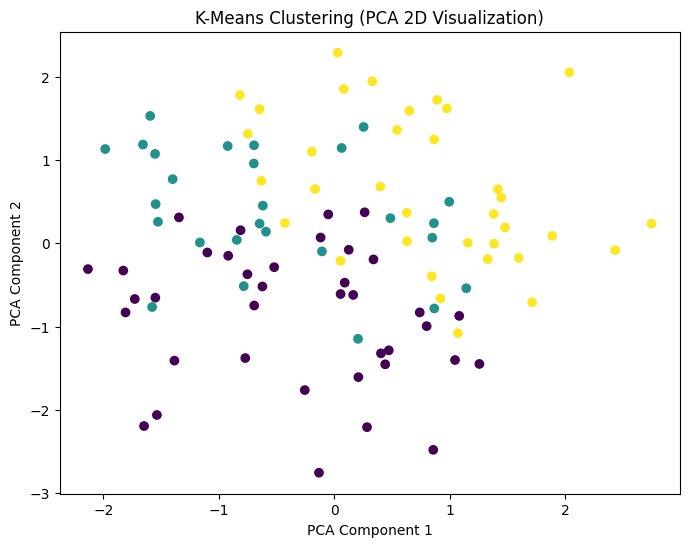

In [7]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

plt.figure(figsize=(8,6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=clusters, cmap='viridis')
plt.title('K-Means Clustering (PCA 2D Visualization)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


In [8]:
cluster_summary = df.groupby('Cluster')[features].mean()
print(cluster_summary)


                 price  bedrooms  bathrooms  sqft_living     sqft_lot  \
Cluster                                                                 
0        598194.611634  3.157895   2.185319  2386.184211  5208.315789   
1        447534.943860  2.888109   2.556335  2079.703704  7328.740741   
2        354862.442406  2.884812   1.429774  3830.828571  5137.828571   

           floors  
Cluster            
0        1.000000  
1        1.814815  
2        1.600000  


# ***📝 Reflection:***
After applying K-Means and PCA, we observed that Cluster 0 contains high-priced houses with more bedrooms and larger living area, while Cluster 2 represents smaller, lower-priced homes.
This helps us identify distinct market segments based on house characteristics.